In [2]:
pip install tensorflow numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow==2.13.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.13.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.13.0


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

ImportError: cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (C:\Users\Subham Gupta\anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py)

In [1]:
import tensorflow as tf
print(tf.__version__)


ImportError: cannot import name 'float8_e4m3b11fnuz' from 'tensorflow.python.framework.dtypes' (C:\Users\Subham Gupta\anaconda3\Lib\site-packages\tensorflow\python\framework\dtypes.py)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array


In [37]:
IMAGE_SIZE = [224, 224]

train_path = 'original_vehivle_dataset/train'
valid_path = 'original_vehicle_dataset/test'

In [39]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [40]:
for layer in resnet.layers:
    layer.trainable = False

In [41]:
folders = glob('dataset/train/*')

In [45]:
folders

['dataset/train\\angry', 'dataset/train\\happy', 'dataset/train\\sad']

In [47]:
x = Flatten()(resnet.output)

In [49]:
prediction = Dense(12, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [51]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,989,124 (91.51 MB)

 Trainable params: 401,412 (1.53 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [53]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [57]:
training_set = train_datagen.flow_from_directory('dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5391 images belonging to 4 classes.


In [59]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3700 images belonging to 4 classes.


In [61]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

169/169 ━━━━━━━━━━━━━━━━━━━━ 509s 3s/step - accuracy: 0.3438 - loss: 2.6995 - val_accuracy: 0.4089 - val_loss: 1.8909


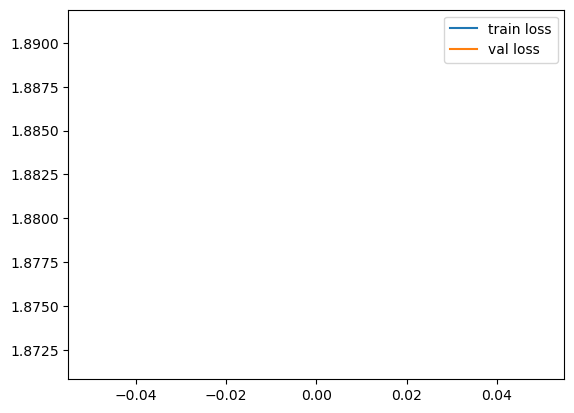

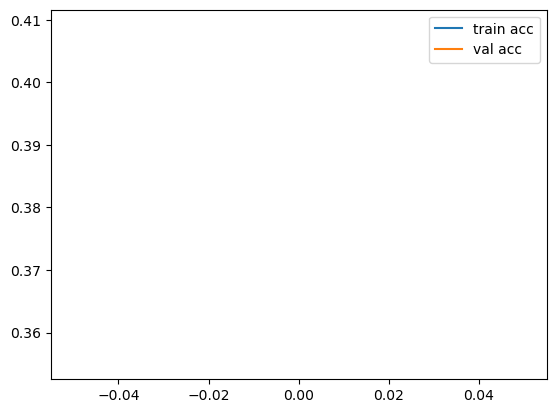

<Figure size 640x480 with 0 Axes>

In [63]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [92]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.keras')

In [94]:
y_pred = model.predict(test_set)

116/116 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step


In [96]:
y_pred

array([[2.0027075e-33, 8.4090397e-02, 9.1348267e-01, 2.4269614e-03],
       [1.2214550e-31, 2.0587622e-01, 7.8534359e-01, 8.7802280e-03],
       [1.9072071e-31, 2.8096807e-01, 7.0120239e-01, 1.7829612e-02],
       ...,
       [2.9377047e-31, 2.6327047e-01, 7.1271563e-01, 2.4013909e-02],
       [2.6285965e-31, 2.7621633e-01, 7.0276213e-01, 2.1021569e-02],
       [2.9985187e-31, 2.4210307e-01, 7.3915112e-01, 1.8745894e-02]],
      dtype=float32)

In [98]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [100]:
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [102]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [108]:
model=load_model('model_resnet50.keras')

In [116]:
img=image.load_img('dataset/test/happy/im1087.png',target_size=(224,224))

In [118]:
x=image.img_to_array(img)
x

array([[[163., 163., 163.],
        [163., 163., 163.],
        [163., 163., 163.],
        ...,
        [201., 201., 201.],
        [201., 201., 201.],
        [201., 201., 201.]],

       [[163., 163., 163.],
        [163., 163., 163.],
        [163., 163., 163.],
        ...,
        [201., 201., 201.],
        [201., 201., 201.],
        [201., 201., 201.]],

       [[163., 163., 163.],
        [163., 163., 163.],
        [163., 163., 163.],
        ...,
        [201., 201., 201.],
        [201., 201., 201.],
        [201., 201., 201.]],

       ...,

       [[241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [173., 173., 173.],
        [173., 173., 173.],
        [173., 173., 173.]],

       [[241., 241., 241.],
        [241., 241., 241.],
        [241., 241., 241.],
        ...,
        [173., 173., 173.],
        [173., 173., 173.],
        [173., 173., 173.]],

       [[241., 241., 241.],
        [241., 241., 241.],
        [241., 2

In [120]:
x.shape

(224, 224, 3)

In [122]:
x=x/255

In [124]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [126]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[3.4357806e-15, 4.4610471e-01, 1.0688414e-02, 5.4320687e-01]],
      dtype=float32)

In [128]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


In [138]:
a==3

array([ True])